This is a notebook that seeks to explain and give insights concerning the data used in this project. The objective of preparing this notebook is to better understand the relationship of various factors in the dataset that can be related to heart disease. The original database contains 76 attributes, but usually most published experiments refer to using a subset of 14 of them,so we will be using these 14 features for analysing.

From: One ML-Noob ^_^

To: Whoever wants to change the world for the better

## Data Attribute Description

- **age** --> The person's age in years
- **sex** --> The person's sex (1 = male, 0 = female)
- **cp** -->   The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value                  4: asymptomatic)
- **trestbps** --> The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol** -->    The person's cholesterol measurement in mg/dl
- **fbs** -->     The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg** --> Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable                     or definite left ventricular hypertrophy by Estes' criteria)
- **thalach** --> The person's maximum heart rate achieved
- **exang** --> Exercise induced angina (1 = yes; 0 = no)
- **oldpeak** --> ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca** --> The number of major vessels (0-3)
- **thal** --> A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target** --> Heart disease (0 = no, 1 = yes)

# Contents

1. [Introduction ](#section1)
2. [The Data](#section2)
3. [The Model](#section3)
4. [Conclusion](#section5)

# Section 1: Introduction

Python is great for data science as it has a great community of developers dedicated to contributing massively in terms of libraries that makes data processing and model creation a far less painstaking thing to do in modern times.

In [1]:
# Import of libraries we will be using in analyzing the data and creating the model
import numpy as np # Library for Linear algebra
import pandas as pd # Data processing functionalities
import matplotlib.pyplot as plt # Plotting graphs
import seaborn as sns # Customizing graphs

In [4]:
# Load the dataset which will be used for analysis and training model
heart_data = pd.read_csv("../input/heart.csv")

# Section 2: The Data

### Exploring the structure of the data

In [5]:
n_rows, n_cols = heart_data.shape
print(f"There exists {n_rows} domain instances with {n_cols} features in the dataset.")

There exists 303 domain instances with 14 features in the dataset.


In [6]:
features = list(heart_data.columns)

for feature in range(len(features)):
    print("Column {0} in the dataset is {1}".format(feature+1, features[feature].title()))

Column 1 in the dataset is Age
Column 2 in the dataset is Sex
Column 3 in the dataset is Cp
Column 4 in the dataset is Trestbps
Column 5 in the dataset is Chol
Column 6 in the dataset is Fbs
Column 7 in the dataset is Restecg
Column 8 in the dataset is Thalach
Column 9 in the dataset is Exang
Column 10 in the dataset is Oldpeak
Column 11 in the dataset is Slope
Column 12 in the dataset is Ca
Column 13 in the dataset is Thal
Column 14 in the dataset is Target


In [7]:
# The head method operates on a dataframe by displaying a number of rows. The first 5 rows are displayed if no arguments are passed.
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Checking to see if there are any null values in our dataset.
heart_data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [9]:
# Checking to see if there are any duplicated data in dataset
heart_data[heart_data.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
# Removing duplicate data
heart_data.drop_duplicates(inplace=True)

n_rows, n_cols = heart_data.shape
print(f"After removing duplicate data we now have {n_rows} domain instances.")

After removing duplicate data we now have 302 domain instances.


### Since there are no null values and duplicates, our data is good to go for analysis and visualizations

In [11]:
# The pandas dataframe object created i.e. heart_data enables us to retrieve data using column headers
# First thing we are interested in is the distribution of patients on both ends. i.e. diseased and not diseased
heart_data.groupby('target').size()

target
0    138
1    164
dtype: int64

- 0: No heart disease
- 1: Heart disease
#### In the cell above, we realized that out of 303 instances within the dataset, 138 people were diagnosed to not have a heart disease and 164 people were diagnosed to have had it.

In [12]:
not_diseased = len(heart_data[heart_data.target == 0])
diseased = len(heart_data[heart_data.target == 1])
print(f"The percentage of diseased patients within this dataset is {round((diseased/len(heart_data.target)), 2)*100}% leaving {round((not_diseased/len(heart_data.target)), 2)*100}% of the subjects as patients diagnosed to not have the heart disease.")

The percentage of diseased patients within this dataset is 54.0% leaving 46.0% of the subjects as patients diagnosed to not have the heart disease.


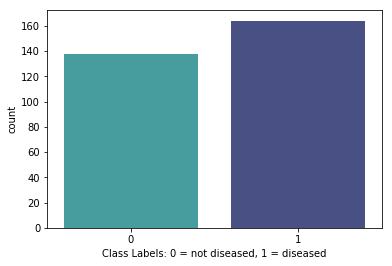

In [13]:
sns.countplot(x='target', data=heart_data, palette='mako_r')
plt.xlabel("Class Labels: 0 = not diseased, 1 = diseased")
plt.show()

### Gender Impact on risk of heart disease
P.S. Research on how gender affects a person's chance of getting a heart disease

In [14]:
male_gender = len(heart_data[heart_data.sex == 1])
female_gender = len(heart_data[heart_data.sex == 0])

print("In this dataset there exists {0} male subjects and {1} female subjects which computes to {2}% for males and {3}% for females.".format(male_gender, female_gender, round((male_gender/len(heart_data.sex)), 2)*100, round((female_gender/len(heart_data.sex)), 2)*100))

In this dataset there exists 206 male subjects and 96 female subjects which computes to 68.0% for males and 32.0% for females.


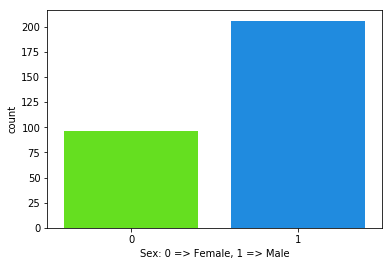

In [15]:
# Visualizing the distribution of Male and Female genders in the data
sns.countplot(x='sex', data=heart_data, palette='gist_rainbow')
plt.xlabel("Sex: 0 => Female, 1 => Male")
plt.show()

***From this observation, we can tell there lies a bias against the female gender in this dataset that needs correction. To create a balance, the number of male subjects could be reduced to level the gender stance but alternatively, which also happens to be the best solution is to rather involve more female in such research undertakings. In Machine Learning, the more data you have the better as well as a reduction in its bias.***

In [16]:
# We can utilize the crosstab method in the pandas library to analyze how gender impacts a person's chance of getting a heart disease
gender_impact = pd.crosstab(heart_data['sex'], heart_data['target'])
gender_impact

target,0,1
sex,,
0,24,72
1,114,92


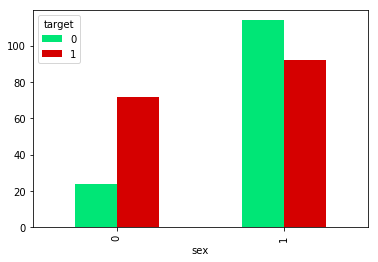

In [17]:
# We can go further to visualize these stats for a clearer view
gender_impact.plot(kind='bar', stacked=False, color=['#00e676', '#d50000'])

### Insights:
***(ref: dataset)***
    
    - Number of females free from heart disease = 24
    - Number of females diagnosed as having heart disease = 72
    
    - Number of males free from heart disease = 114
    - Number of males diagnosed as having heart disease = 93
    

It is evident from the data that females stand a higher risk of getting a heart disease than men.

--------------------------------------------------------------------------------------------------------------------------

In [18]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**The features described in the above data set are:**

**1. Count**: tells us the number of NoN-empty rows in a feature.<br>

**2. Mean**: tells us the mean value of that feature.<br>

**3. Std**: tells us the Standard Deviation Value of that feature.<br>

**4. Min**: tells us the minimum value of that feature.<br>

**5. 25%**, **50%**, and **75%**: are the percentile/quartile of each features.<br>

**6. Max**: tells us the maximum value of that feature.<br>


### Key Insights

    - Total domain instances: 302
    - Mean age (both genders put together): 54.42
    - Minimum age (no persons below this age were part of the study): 29
    - Maximum age (no persons above this age were part of the study): 77

In [19]:
# This provides us with the 'mean' subset of the describe() method
heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


-----------------------------------------------------------------------------------------------------------------------

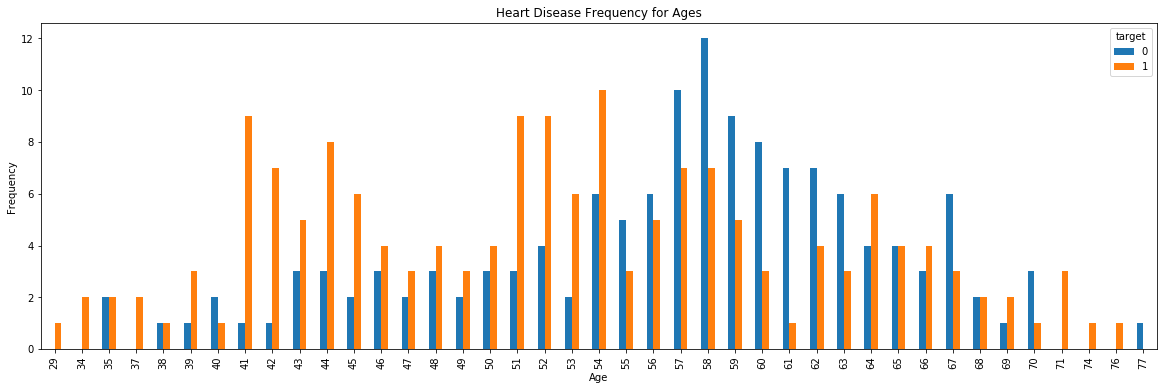

In [20]:
pd.crosstab(heart_data.age,heart_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

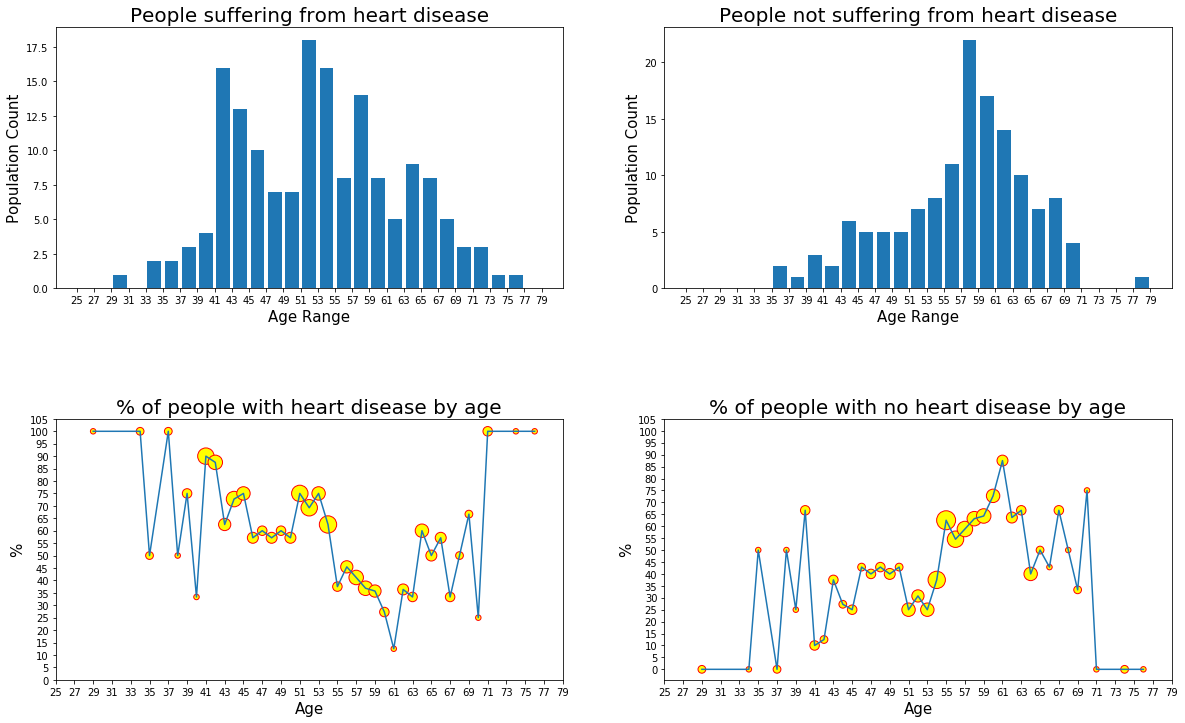

In [21]:
# Population distribution for heart disease

x = heart_data.groupby(['age','target']).agg({'sex':'count'})
y = heart_data.groupby(['age']).agg({'sex':'count'})
z = (x.div(y, level='age') * 100)
q= 100 - z
bin_x = range(25,80,2)

fig, axes = plt.subplots(2,2, figsize = (20,12))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].hist(heart_data[heart_data['target']==1].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age Range',fontsize=15)
axes[0,0].set_ylabel('Population Count',fontsize=15)
axes[0,0].set_title('People suffering from heart disease',fontsize=20)

axes[0,1].hist(heart_data[heart_data['target']==0].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age Range',fontsize=15)
axes[0,1].set_ylabel('Population Count',fontsize=15)
axes[0,1].set_title('People not suffering from heart disease',fontsize=20)

axes[1,0].scatter(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex,s=(x.xs(1,level=1).sex)*30,edgecolors = 'r',c = 'yellow')
axes[1,0].plot(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_yticks(range(0,110,5))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('%',fontsize=15)
axes[1,0].set_title('% of people with heart disease by age',fontsize=20)

axes[1,1].scatter(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex,s=(x.xs(0,level=1).sex)*30,edgecolors = 'r',c = 'yellow')
axes[1,1].plot(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_yticks(range(0,110,5))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('%',fontsize=15)
axes[1,1].set_title('% of people with no heart disease by age',fontsize=20)

plt.show()

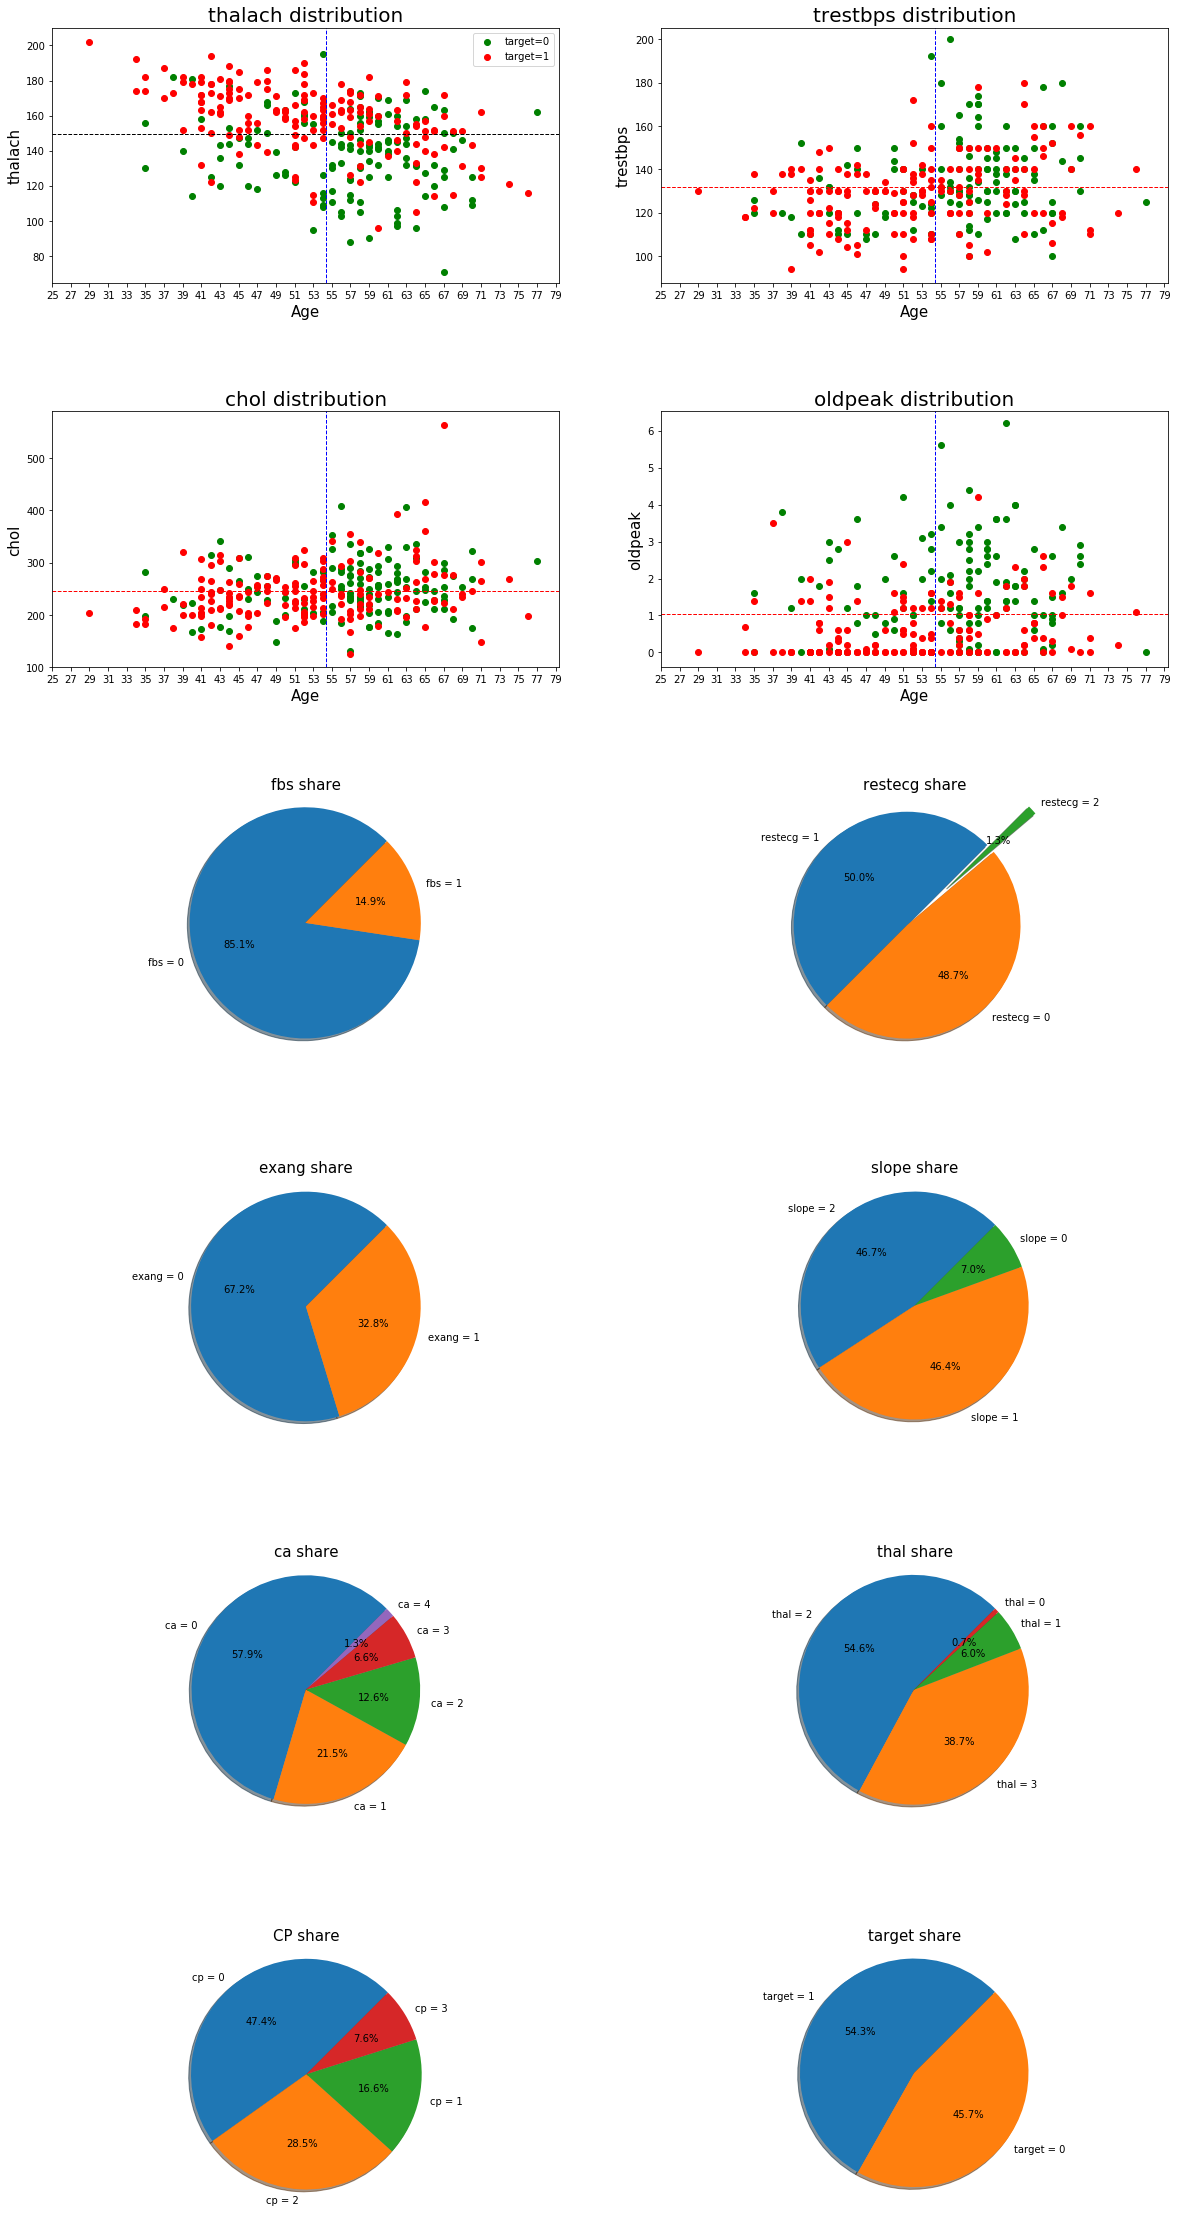

In [23]:
fig, axes = plt.subplots(6,2, figsize = (20,40))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].scatter(heart_data[heart_data['target']==0][['age','thalach']].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','thalach']].sort_values(by = ['age']).thalach, c = 'g',label = 'target=0')
axes[0,0].scatter(heart_data[heart_data['target']==1][['age','thalach']].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','thalach']].sort_values(by = ['age']).thalach, c = 'r',label = 'target=1')
axes[0,0].set_title('thalach distribution',fontsize=20)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age',fontsize=15)
axes[0,0].set_ylabel('thalach',fontsize=15)
axes[0,0].axhline(np.mean(heart_data['thalach']),xmin=0,xmax=1,linewidth=1, color='black',linestyle = '--')
axes[0,0].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')
axes[0,0].legend()

axes[0,1].scatter(heart_data[heart_data['target']==0][['age','trestbps']].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'g',label = 'target=0')
axes[0,1].scatter(heart_data[heart_data['target']==1][['age','trestbps']].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'r',label = 'target=1')
axes[0,1].set_title('trestbps distribution',fontsize=20)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age',fontsize=15)
axes[0,1].set_ylabel('trestbps',fontsize=15)
axes[0,1].axhline(np.mean(heart_data['trestbps']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[0,1].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

# heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age'])
axes[1,0].scatter(heart_data[heart_data['target']==0][['age','chol',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','chol',]].sort_values(by = ['age']).chol,c = 'g',label = 'target=0')
axes[1,0].scatter(heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age']).chol,c = 'r',label = 'target=1')
axes[1,0].set_title('chol distribution',fontsize=20)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('chol',fontsize=15)
axes[1,0].axhline(np.mean(heart_data['chol']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,0].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

axes[1,1].scatter(heart_data[heart_data['target']==0][['age','oldpeak',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'g',label = 'target=0')
axes[1,1].scatter(heart_data[heart_data['target']==1][['age','oldpeak',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'r',label = 'target=1')
axes[1,1].set_title('oldpeak distribution',fontsize=20)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('oldpeak',fontsize=15)
axes[1,1].axhline(np.mean(heart_data['oldpeak']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,1].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

fbs_count = heart_data['fbs'].value_counts()
labels = [('fbs = '+ str(x)) for x in fbs_count.index]
axes[2,0].pie(fbs_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[2,0].axis('equal')
axes[2,0].set_title('fbs share',fontsize=15)

restecg_count = heart_data['restecg'].value_counts()
labels = [('restecg = '+ str(x)) for x in restecg_count.index]
axes[2,1].pie(restecg_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45,explode = [0,0,0.5])
axes[2,1].axis('equal')
axes[2,1].set_title('restecg share',fontsize=15)

exang_count = heart_data['exang'].value_counts()
labels = [('exang = '+ str(x)) for x in exang_count.index]
axes[3,0].pie(exang_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[3,0].axis('equal')
axes[3,0].set_title('exang share',fontsize=15)

slope_count = heart_data['slope'].value_counts()
labels = [('slope = '+ str(x)) for x in slope_count.index]
axes[3,1].pie(slope_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[3,1].axis('equal')
axes[3,1].set_title('slope share',fontsize=15)

ca_count = heart_data['ca'].value_counts()
labels = [('ca = '+ str(x)) for x in ca_count.index]
axes[4,0].pie(ca_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[4,0].axis('equal')
axes[4,0].set_title('ca share',fontsize=15)

thal_count = heart_data['thal'].value_counts()
labels = [('thal = '+ str(x)) for x in thal_count.index]
axes[4,1].pie(thal_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[4,1].axis('equal')
axes[4,1].set_title('thal share',fontsize=15)

cp_count = heart_data['cp'].value_counts()
labels = [('cp = '+ str(x)) for x in cp_count.index]
axes[5,0].pie(cp_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[5,0].axis('equal')
axes[5,0].set_title('CP share',fontsize=15)

target_count = heart_data['target'].value_counts()
labels = [('target = '+ str(x)) for x in target_count.index]
axes[5,1].pie(target_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[5,1].axis('equal')
axes[5,1].set_title('target share',fontsize=15)

plt.show()

In [24]:
# Produce a correlation matrix to reveal how independent features within the data affect the target
correlations = heart_data.corr()
pd.DataFrame(correlations['target']).sort_values(by='target', ascending=False)

,target
target,1.000000
cp,0.432080
thalach,0.419955
slope,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trestbps,-0.146269
age,-0.221476
sex,-0.283609


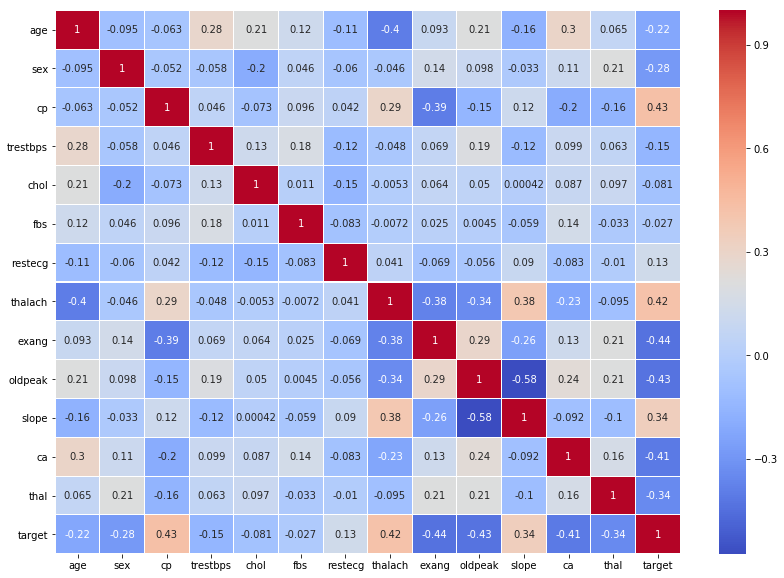

In [25]:
# Visual representation
plt.figure(figsize=(14,10))
sns.heatmap(heart_data.corr(), linewidths=.01, annot = True, cmap='coolwarm')
plt.show()

### We can see that the attributes having :

* **Positive relationships**<br>
chest pain = target<br>
thalcah = slope<br>
thalach = target<br>
slope = target<br>

* **Negative relationships**<br>
oldpeak =slope<br>
cp = exang<br>
age = thalach

# Section 3:  The Model


### **Logistic Regression**


Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary. Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = heart_data.iloc[:, :-1]
y = heart_data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy  84.21052631578947


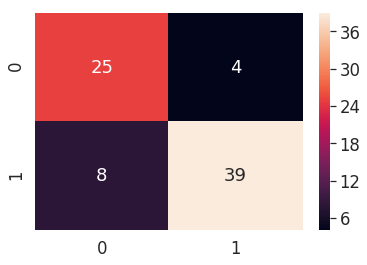

In [27]:
# Model
heart_model = LogisticRegression()
heart_model.fit(X_train, y_train)

# Making predictions
predictions = heart_model.predict(X_test)

# Checking the Accuracy of predictions
print("Accuracy ", heart_model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [28]:
print(heart_model.predict([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]))

[1]


In [29]:
print(heart_model.predict([[65, 1, 0, 135, 254, 0, 0, 127, 0, 2.8, 1, 1, 3]]))

[0]


### **Decision Tree**

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

Accuracy  77.63157894736842


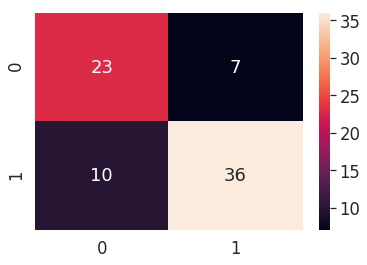

In [30]:
# Model using decision trees
heart_model_dt = DecisionTreeClassifier()

#fiting the model
heart_model_dt.fit(X_train, y_train)

#prediction
dt_predictions = heart_model_dt.predict(X_test)

#Accuracy
print("Accuracy ", heart_model_dt.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(dt_predictions, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [31]:
print(heart_model_dt.predict([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]))

[1]


In [32]:
print(heart_model_dt.predict([[65, 1, 0, 135, 254, 0, 0, 127, 0, 2.8, 1, 1, 3]]))

[0]
